<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Linear-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
import sklearn
import numpy as np
print(tf.__version__)

In [0]:
from sklearn.datasets import load_breast_cancer 
D = load_breast_cancer()

In [3]:
D.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
X = D['data']
# X.shape # --> (569, 30)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
Y = D['target']
# Y.shape # --> (569,)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
# from sklearn.utils import shuffle
X, Y = sklearn.utils.shuffle(X, Y)

In [7]:
D['target_names'] # malignant --> 0 and benign --> 1

array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [31]:
N, D = X_train.shape
print(N, D)

381 30


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D)),
    tf.keras.layers.Dense(1, activation='softmax')                             
])

In [42]:
help(tf.keras.layers.Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size 

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'],
)

In [39]:
result = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 2/100
381/381 [==============================] - 0s 97us/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 3/100
381/381 [==============================] - 0s 96us/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 4/100
381/381 [==============================] - 0s 109us/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 5/100
381/381 [==============================] - 0s 108us/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 6/100
381/381 [==============================] - 0s 91us/sample - loss: 5.6834 - accuracy: 0.6273 - val_loss: 5.6779 - val_accuracy: 0.6277
Epoch 7/100
381/381 [==============================] - 0s 99us/sample - loss:

In [40]:
print('Training Accuracy: {}'.format(model.evaluate(X_train, Y_train)))
print('Testing Accuracy: {}'.format(model.evaluate(X_test, Y_test)))

# # Evaluate the model - evaluate() returns loss and accuracy
# print("Train score:", model.evaluate(X_train, Y_train))
# print("Test score:", model.evaluate(X_test, Y_test))

381/381 [==============================] - 0s 51us/sample - loss: 5.6834 - accuracy: 0.6273
Training Accuracy: [5.683443212133693, 0.62729657]
188/188 [==============================] - 0s 68us/sample - loss: 5.6779 - accuracy: 0.6277
Testing Accuracy: [5.67790793865285, 0.62765956]


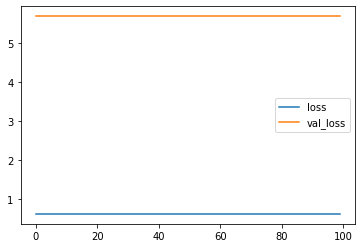

In [41]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='loss')
plt.plot(result.history['loss'], label='val_loss')
plt.legend()